In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### 1.	What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?

Scale of measurement for timeseries data is interval scale.
Timeseries data is continuous because



Each time series is a unique sequence of data points that consists of a data value and a timestamp.
Timeseries can be discrete as well as continuous

    A discrete time series consists of data points separated by time intervals that are greater than one second. A discrete time series might have:
    A data-reporting interval that is infrequent or irregular 
    Gaps where values are missing due to reporting interruptions

    A continuous time series contains one data point per second. Because Wavefront accepts and stores data at up to 1 second resolution, a continuous time series has a data value corresponding to every moment in time that can be represented on the X-axis of a chart.

#### 2.	What does ARIMA stand for? Break down and explain each piece in the name.

ARIMA stands for Autoregressive Integrated Moving Average Model.
We can understand it better by breaking down it's name:

"AR" stands for autoregression, which refers to the model that predicts future values based on past values.

The “I” stands for integrated, which means it observes the difference between static data values and previous values. The goal is to achieve stationary data that is not subject to seasonality. 
The statistical properties of a stationary data series, such as mean, variance and autocorrelation, are constant over time.

“MA” represents the moving average, which is the dependency between an observed value and a residual error from a moving average model applied to previous observations.

#### 3.	Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.

In [2]:
# importing and inspecting the temperatures data
temp_data = pd.read_csv("temperatures/temperature.csv",parse_dates=True,index_col='datetime')
temp_data.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [3]:
def kelvin_to_C_F(city,scale='F'):
    """Function converts the the pd Series with temp in Kelvin to either Celsius or Fahrenheit"""
    try:
        if scale == 'F':
            city = (city-273.15) * 9/5 + 32
        elif scale == 'C':
            city = city - 273.15
        else:
            print("Scale should either be Celsius(C) or Fahrenheit(F)")
    except Exception as e:
        print(e)
    return city
    

In [4]:
# Creating two empty df and using for loop to call function for each column in temp_data to covert temperature data from Kelvinc to C or F

temp_data_cel = pd.DataFrame(index=temp_data.index)
temp_data_feh = pd.DataFrame(index=temp_data.index)

for col in temp_data.columns:
    temp_data_cel[col] = kelvin_to_C_F(temp_data[col],scale='C')

for col in temp_data.columns:
    temp_data_feh[col] = kelvin_to_C_F(temp_data[col])

In [5]:
# Checking the new data frames with temp in Celsius and Fahrenheit
display(temp_data_cel.head())
temp_data_feh.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
2012-10-01 15:00:00,11.476998,8.941867,16.310618,8.639833,18.712845,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697789,14.081672,34.241513,31.131841,37.261539,31.25,31.25,30.35
2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700441,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,52.628000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,52.623150,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,52.609852,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,52.596554,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


#### 4.	Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.

In [6]:
temp_data_cel_fillna = temp_data_cel.interpolate(limit=4,limit_direction='both')

In [7]:
display(temp_data_cel_fillna.head(5))
temp_data_cel_fillna.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,35.950000,31.25,31.25,30.35
2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
2012-10-01 15:00:00,11.476998,8.941867,16.310618,8.639833,18.712845,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697789,14.081672,34.241513,31.131841,37.261539,31.25,31.25,30.35
2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700441,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,8.85,NaN,7.67,20.40,19.00,16.39,21.56,12.57,16.41,...,17.09,NaN,1.98,14.93,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,9.74,NaN,8.50,22.53,19.59,17.46,22.44,13.30,17.55,...,16.09,NaN,0.98,12.87,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,10.24,NaN,9.60,22.81,19.43,18.19,23.10,13.29,16.56,...,13.63,NaN,0.33,10.79,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,9.87,NaN,9.81,22.50,19.46,19.00,24.00,12.99,16.02,...,11.42,NaN,-0.67,9.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,9.13,NaN,9.89,21.78,18.25,18.49,24.00,11.55,12.03,...,10.27,NaN,-1.35,7.50,NaN,NaN,NaN,NaN,NaN,NaN


#### 5.	Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.

In [8]:
temp_data_cel_fillna = temp_data_cel_fillna.asfreq('1H')
temp_data_quart = temp_data_cel_fillna.asfreq('Q')
temp_data_quart.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-31 12:00:00,1.340000,1.500,3.76,1.69,5.350,7.14,1.43,5.580,-3.75,-7.12,...,-1.03,-1.380,-10.540000,-2.940,21.110000,16.35,19.60,17.0500,17.050,16.3500
2013-03-31 12:00:00,6.510000,7.220,11.72,5.53,12.940,13.60,16.41,17.310,5.89,4.05,...,0.60,3.640,-1.180000,3.690,26.396667,24.42,31.58,22.3500,22.570,24.5000
2013-06-30 12:00:00,17.060000,16.000,18.70,17.66,20.110,18.70,30.26,30.950,15.66,20.24,...,20.73,21.980,15.960000,22.870,31.908000,29.00,37.40,25.1080,25.108,31.5080
2013-09-30 12:00:00,9.423333,10.889,17.02,9.47,15.185,15.49,16.00,17.155,3.32,13.49,...,12.00,10.285,8.963333,9.000,28.637500,28.00,34.00,26.3015,25.764,27.5515
2013-12-31 12:00:00,5.910000,3.285,5.22,5.92,8.575,8.19,2.11,3.795,-3.38,1.89,...,-4.74,-6.600,-18.120000,-10.155,9.097000,16.35,18.00,13.8900,13.890,10.1680


In [9]:
temp_data_quart['quarter_ending'] = temp_data_quart.index.month
display(temp_data_quart.head())
temp_data_quart['S/W'] = ['S' if i ==  6 or i == 9 else 'W' for i in temp_data_quart['quarter_ending']]
temp_data_quart_groupby = temp_data_quart.groupby('S/W').mean()
cityA = []
cityB = []
city = list(temp_data_cel.columns)
#for city in temp_data_quart_groupby.columns:
temp_data_quart_groupby.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,quarter_ending
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-31 12:00:00,1.340000,1.500,3.76,1.69,5.350,7.14,1.43,5.580,-3.75,-7.12,...,-1.380,-10.540000,-2.940,21.110000,16.35,19.60,17.0500,17.050,16.3500,12
2013-03-31 12:00:00,6.510000,7.220,11.72,5.53,12.940,13.60,16.41,17.310,5.89,4.05,...,3.640,-1.180000,3.690,26.396667,24.42,31.58,22.3500,22.570,24.5000,3
2013-06-30 12:00:00,17.060000,16.000,18.70,17.66,20.110,18.70,30.26,30.950,15.66,20.24,...,21.980,15.960000,22.870,31.908000,29.00,37.40,25.1080,25.108,31.5080,6
2013-09-30 12:00:00,9.423333,10.889,17.02,9.47,15.185,15.49,16.00,17.155,3.32,13.49,...,10.285,8.963333,9.000,28.637500,28.00,34.00,26.3015,25.764,27.5515,9
2013-12-31 12:00:00,5.910000,3.285,5.22,5.92,8.575,8.19,2.11,3.795,-3.38,1.89,...,-6.600,-18.120000,-10.155,9.097000,16.35,18.00,13.8900,13.890,10.1680,12


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,quarter_ending
S/W,,,,,,,,,,,,,,,,,,,,,
S,12.221333,11.9116,14.52365,12.00470,17.61165,17.21265,22.9297,23.5192,13.02615,13.57965,...,18.23250,13.610333,17.7692,30.430650,30.227000,36.318400,30.285850,29.076100,30.01210,7.5
W,2.693297,2.3209,8.13540,2.35065,8.73815,9.06815,5.5119,9.1689,-0.24685,-2.95960,...,1.25139,-6.370321,0.0849,17.322716,19.035076,21.323667,18.250028,17.843644,17.87745,7.5


In [10]:
for i in city:
    for j in city:
        if (temp_data_quart_groupby[i]['S'] > temp_data_quart_groupby[j]['S']) & (temp_data_quart_groupby[i]['W'] < temp_data_quart_groupby[j]['W']):
            cityA.append(j)
            cityB.append(i)
        

result_df = pd.DataFrame(cityA,cityB)
result_df.reset_index(inplace=True)
result_df.columns = ['City A','City B']
result_df.head()

,City A,City B
0,Los Angeles,San Diego
1,Las Vegas,San Francisco
2,Las Vegas,Los Angeles
3,Las Vegas,San Diego
4,Las Vegas,San Antonio


#### 6.	For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.

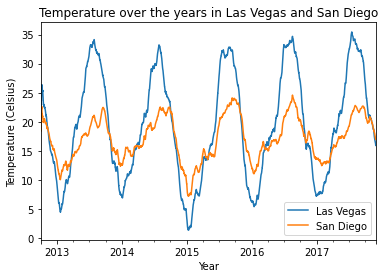

In [11]:
temp_data_cel_fillna[["Las Vegas","San Diego"]].rolling('30D').mean().plot(title="Temperature over the years in Las Vegas and San Diego")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

Rolling average takes average of the data points in a widow. In the above case a widow of 30 calendar days were selected to calculate average temperature.

Moving average model is used for time series analysis for future prediction. It is used when the output data is linearly dependendt on the past and present values. Because of this MA model assumes equal weights for all data points unlike the rolling average.

#### 7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.
a.	Graph the predicted values 30 days out.

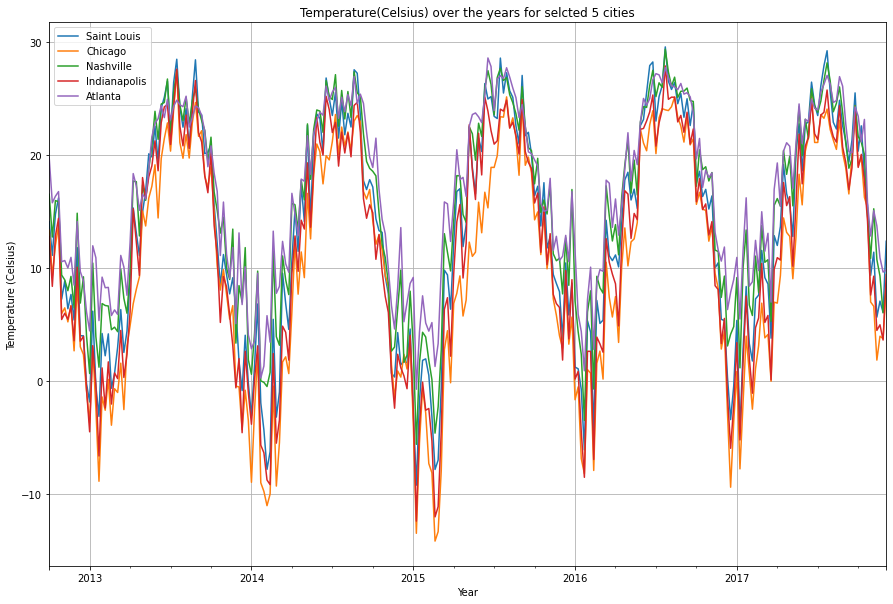

In [12]:
# Resampling the data for from hourly to daily
temp_data_df = temp_data_cel_fillna.resample('W').mean()

# List of 5 cities
city_five = temp_data.columns[15:20]

fig, ax = plt.subplots(figsize=(15,10))
for c in city_five:
    temp_data_df[c].plot(legend=True,grid=True,title="Temperature(Celsius) over the years for selcted 5 cities",xlabel="Year",ylabel="Temperature (Celsius)")

plt.show()


Graph shows clear seasonal components but is not stationary.


C:\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


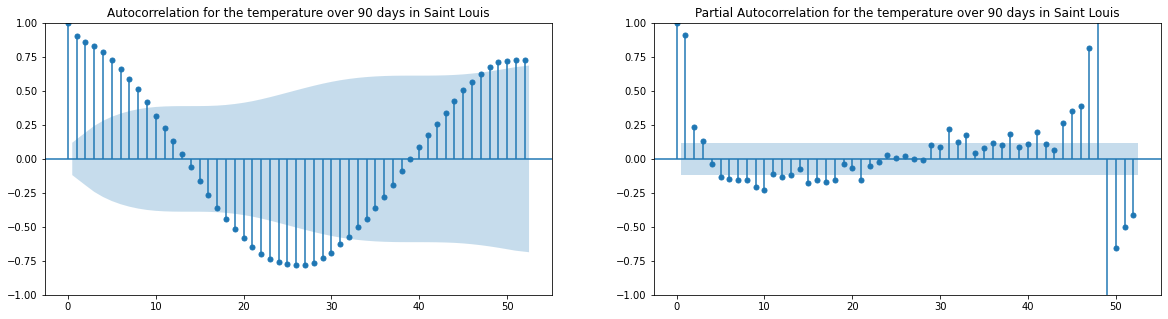

C:\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


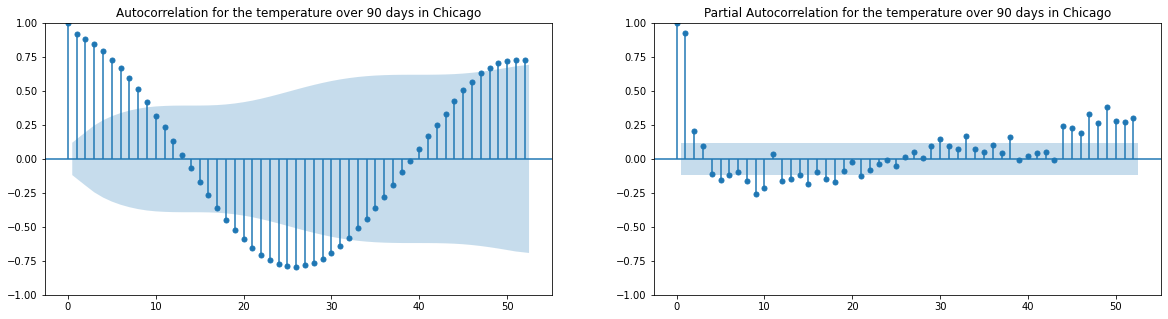

C:\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


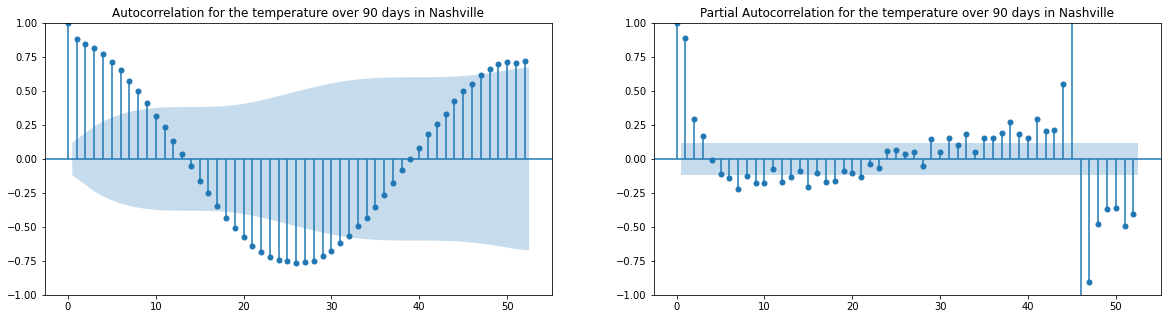

C:\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


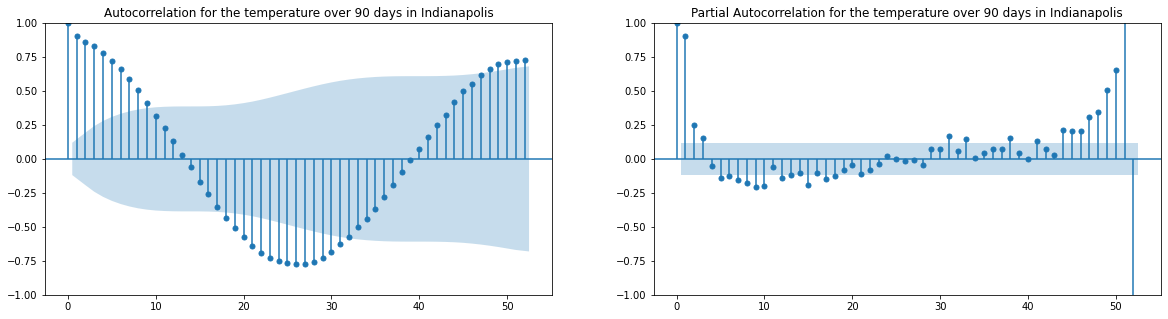

C:\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


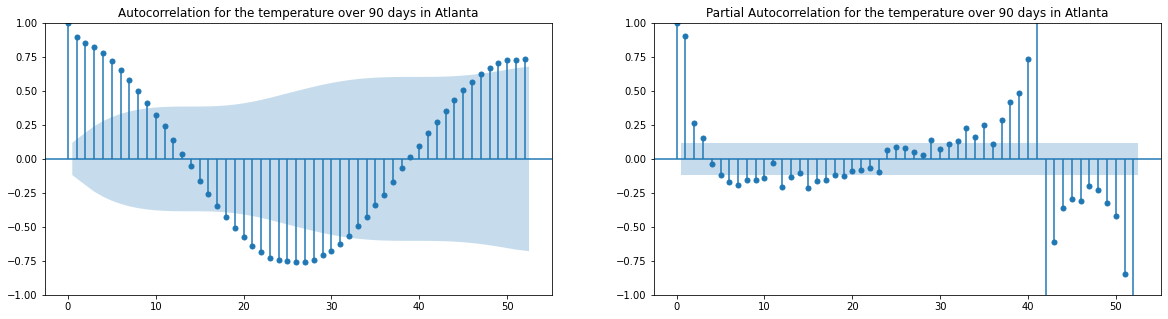

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for c in city_five:
    fig, ax = plt.subplots(1,2, figsize=(20,5))
    plot_acf(temp_data_df[c], lags = 52, ax=ax[0],title="Autocorrelation for the temperature over 90 days in {city}".format(city=c))
    plot_pacf(temp_data_df[c], lags = 52, ax=ax[1],title="Partial Autocorrelation for the temperature over 90 days in {city}".format(city=c))
    plt.show()


C:\Users\saksh\AppData\Local\Temp/ipykernel_7184/1526181630.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  model = pd.Series()
C:\Users\saksh\AppData\Local\Temp/ipykernel_7184/1526181630.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  results = pd.Series()


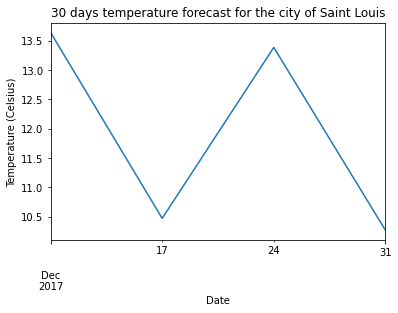

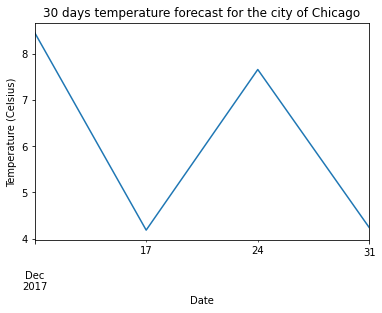

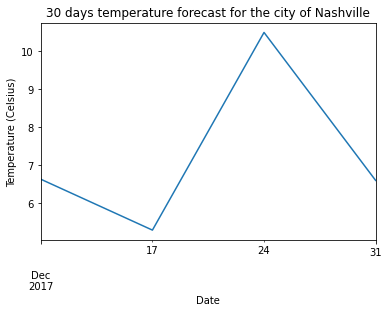

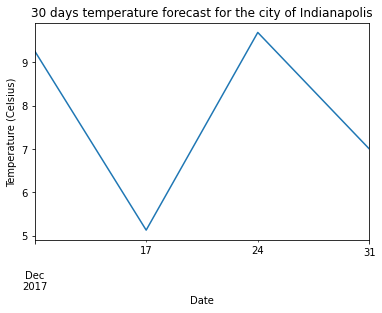

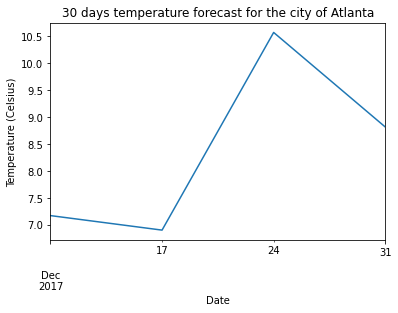

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = pd.Series()
results = pd.Series()
for c in city_five:
    model[c] = SARIMAX(temp_data_df[c],order=(0,1,0), seasonal_order=(2,1,0,52))
    results[c] = model[c].fit(low_memory=True)
    #print("Summary : ", results[c].summary())
    results[c].forecast(steps=4).plot(title="30 days temperature forecast for the city of {city}".format(city=c), xlabel="Date", ylabel="Temperature (Celsius)")
    plt.show()

In [15]:
for c in city_five:
    print("\033[1m Summary for ",c,": \n \033[0m", results[c].summary())

 Summary for  Saint Louis : 
                                       SARIMAX Results                                      
Dep. Variable:                        Saint Louis   No. Observations:                  270
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -653.370
Date:                            Wed, 08 Dec 2021   AIC                           1312.741
Time:                                    18:59:49   BIC                           1322.881
Sample:                                10-07-2012   HQIC                          1316.837
                                     - 12-03-2017                                         
Covariance Type:                           approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.6782      0.080     -8.514      0.000      -0.834      -0.522
ar.S

#### 8.	Explain what you see when you perform results.summary() on the cities in question 7. 

Summary Observations:

    - P value should be less than 0.05. This parameter was checked to decide the right model fit.
    - AIC and BIC values were also checked. The model with the lowes AIC value was selected. 
    There is no specific acceptable values for AIC and BIC. These values are depended on Log Likelihood. Hence varies from case to case. 
    - From AR coeff value we can determine that data is mean reverting in opposite directions. 
    

#### Bonus:
#### What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.

Problem with ARIMA and SARIMA:
Autoregressive models can be developed for univariate time series data that is stationary (AR), has a trend (ARIMA), and has a seasonal component (SARIMA).
One aspect of a univariate time series that these autoregressive models do not model is a change in the variance over time.


The ARCH or Autoregressive Conditional Heteroskedasticity method provides a way to model a change in variance in a time series that is time dependent, such as increasing or decreasing volatility.

    Autoregressive: The current value can be expressed as a function of the previous values i.e. they are correlated.
    Conditional: This informs that the variance is based on past errors.
    Heteroskedasticity: This implies the series displays varying variance.

Generalized Autoregressive Conditional Heteroskedasticity, or GARCH, is an extension of the ARCH model that incorporates a moving average component together with the autoregressive component.
Introduction of moving average component allows the model to model the conditional change in variance over time.
It supports changes in the time dependent volatility, such as increasing and decreasing volatility in the same series.


In [16]:
from arch import arch_model

for c in city_five:
    model_a = arch_model(temp_data_df[c],  p = 30,
                          mean = 'constant', vol = 'ARCH', dist = 'normal')

    model_fit = model_a.fit(update_freq=30)
    print(model_fit.summary())
    result = model_fit.forecast(reindex=False)
    result.variance

Optimization terminated successfully    (Exit mode 0)
            Current function value: 946.0290614009396
            Iterations: 25
            Function evaluations: 843
            Gradient evaluations: 25
                      Constant Mean - ARCH Model Results                      
Dep. Variable:            Saint Louis   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -946.029
Distribution:                  Normal   AIC:                           1956.06
Method:            Maximum Likelihood   BIC:                           2071.21
                                        No. Observations:                  270
Date:                Wed, Dec 08 2021   Df Residuals:                      269
Time:                        18:59:50   Df Model:                            1
                               Mean Model                               
      

Optimization terminated successfully    (Exit mode 0)
            Current function value: 915.4480035837973
            Iterations: 23
            Function evaluations: 777
            Gradient evaluations: 23
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Nashville   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -915.448
Distribution:                  Normal   AIC:                           1894.90
Method:            Maximum Likelihood   BIC:                           2010.05
                                        No. Observations:                  270
Date:                Wed, Dec 08 2021   Df Residuals:                      269
Time:                        18:59:51   Df Model:                            1
                               Mean Model                               
      

Optimization terminated successfully    (Exit mode 0)
            Current function value: 886.2462423270056
            Iterations: 24
            Function evaluations: 807
            Gradient evaluations: 24
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Atlanta   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -886.246
Distribution:                  Normal   AIC:                           1836.49
Method:            Maximum Likelihood   BIC:                           1951.64
                                        No. Observations:                  270
Date:                Wed, Dec 08 2021   Df Residuals:                      269
Time:                        18:59:52   Df Model:                            1
                               Mean Model                               
      

### Time Series Analysis in Python

 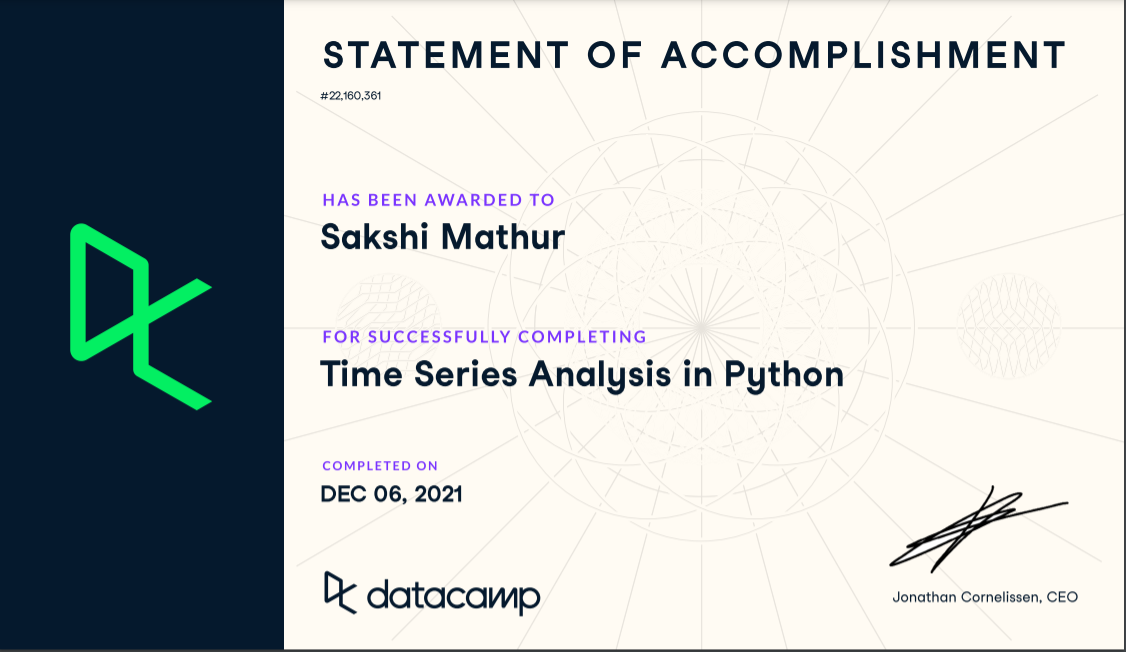